In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
incidents_data = pd.read_csv('incidents.csv')
incidents_data.head()

,Incident_ID,Customer_ID,Age,Gender,Season,Weather,Activity,Slope_Name,Slope_Difficulty,Skill_Level,Protective_Gear,Injuries,Injury_Severity,Response_Time,Hospital_Transport,Hospital_Stay_Length
0,0,2679,33,Male,Winter,Foggy,Skiing,Bunny Hill,Easy,Beginner,Helmet,Sprain,6,15,No,0
1,1,4257,36,Female,Summer,Sunny,Hiking,Devil’s Drop,Expert,Beginner,Helmet,Fracture,6,23,No,0
2,2,7924,47,Female,Winter,Foggy,Snowboarding,Thunder Run,Advanced,Beginner,Helmet,Sprain,8,13,Yes,1
3,3,7224,56,Male,Summer,Sunny,Hiking,Thunder Run,Advanced,Intermediate,Helmet,Fracture,5,9,No,0
4,4,9785,17,Male,Summer,Windy,Climbing,Blue Ridge,Intermediate,Beginner,NaN,Head Injury,8,10,Yes,4


In [19]:
incident_count_by_slope = incidents_data.groupby('Slope_Name').size().reset_index(name='count').sort_values('count')
incident_count_by_slope

,Slope_Name,count
1,Bunny Hill,122
4,Shadow Valley,132
3,Rocky Pass,138
2,Devil’s Drop,141
0,Blue Ridge,143
6,Thunder Run,150
5,Summit Peak,174


In [15]:
mean_response_time_by_slope = incidents_data.groupby('Slope_Name')['Response_Time'].median().reset_index(name='wait_time')
mean_response_time_by_slope

,Slope_Name,wait_time
0,Blue Ridge,13.0
1,Bunny Hill,13.0
2,Devil’s Drop,19.0
3,Rocky Pass,13.0
4,Shadow Valley,12.0
5,Summit Peak,13.0
6,Thunder Run,13.0


In [20]:
data_by_slope = pd.merge(incident_count_by_slope, mean_response_time_by_slope)

In [21]:
data_by_slope

,Slope_Name,count,wait_time
0,Bunny Hill,122,13.0
1,Shadow Valley,132,12.0
2,Rocky Pass,138,13.0
3,Devil’s Drop,141,19.0
4,Blue Ridge,143,13.0
5,Thunder Run,150,13.0
6,Summit Peak,174,13.0


In [44]:
median_injury_severity = incidents_data.groupby("Slope_Name")["Injury_Severity"].median().reset_index(name='median_injury_severity')
median_injury_severity

,Slope_Name,median_injury_severity
0,Blue Ridge,5.0
1,Bunny Hill,5.0
2,Devil’s Drop,7.0
3,Rocky Pass,5.0
4,Shadow Valley,6.0
5,Summit Peak,5.0
6,Thunder Run,5.0


In [51]:
incidents_data["Protective_Gear"] = incidents_data["Protective_Gear"].fillna("None")
protection_injury_dist = incidents_data.groupby(['Injuries']).size().reset_index()

In [52]:
protection_injury_dist

,Injuries,0
0,Concussion,167
1,Fracture,420
2,Head Injury,70
3,Sprain,343


Can train staff to treat sprain, significantly reduce cost of ambulance

In [53]:
def categorize_severity(severity):
    if severity < 4:
        return "Light"
    elif severity < 7:
        return "Moderate"
    else:
        return "Critical"

# Apply the function to create a new column
incidents_data["Severity_Category"] = incidents_data["Injury_Severity"].apply(categorize_severity)

In [56]:

severity_level_dist = incidents_data.groupby(['Slope_Name', 'Severity_Category']).size().reset_index()
severity_level_dist

,Slope_Name,Severity_Category,0
0,Blue Ridge,Critical,38
1,Blue Ridge,Light,22
2,Blue Ridge,Moderate,83
3,Bunny Hill,Critical,33
4,Bunny Hill,Light,14
5,Bunny Hill,Moderate,75
6,Devil’s Drop,Critical,108
7,Devil’s Drop,Moderate,33
8,Rocky Pass,Critical,34
9,Rocky Pass,Light,23


In [60]:
devil_drop_data = incidents_data[incidents_data['Slope_Name']=="Devil’s Drop"]
devil_drop_data

,Incident_ID,Customer_ID,Age,Gender,Season,Weather,Activity,Slope_Name,Slope_Difficulty,Skill_Level,Protective_Gear,Injuries,Injury_Severity,Response_Time,Hospital_Transport,Hospital_Stay_Length,Severity_Category
1,1,4257,36,Female,Summer,Sunny,Hiking,Devil’s Drop,Expert,Beginner,Helmet,Fracture,6,23,No,0,Moderate
6,6,5554,16,Female,Winter,Foggy,Skiing,Devil’s Drop,Expert,Beginner,Helmet,Concussion,7,18,No,0,Critical
12,12,3621,37,Female,Winter,Windy,Skiing,Devil’s Drop,Expert,Beginner,Helmet,Fracture,10,19,Yes,2,Critical
14,14,8433,40,Male,Summer,Rainy,Mountain Biking,Devil’s Drop,Expert,Intermediate,Pads,Sprain,5,18,No,0,Moderate
21,21,1964,17,Male,Winter,Snowy,Skiing,Devil’s Drop,Expert,Beginner,None,Sprain,6,18,No,0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,959,4519,22,Female,Summer,Sunny,Hiking,Devil’s Drop,Expert,Intermediate,Helmet,Sprain,7,16,No,0,Critical
964,964,7086,52,Female,Winter,Foggy,Snowboarding,Devil’s Drop,Expert,Advanced,Helmet,Fracture,8,19,No,0,Critical
977,977,7388,50,Male,Winter,Snowy,Snowboarding,Devil’s Drop,Expert,Advanced,Helmet,Concussion,9,16,No,0,Critical
983,983,5739,19,Male,Winter,Windy,Snowboarding,Devil’s Drop,Expert,Beginner,Pads,Sprain,9,19,No,0,Critical


In [66]:
activity_dist = devil_drop_data.groupby('Activity').size().reset_index(name='count')

<BarContainer object of 5 artists>

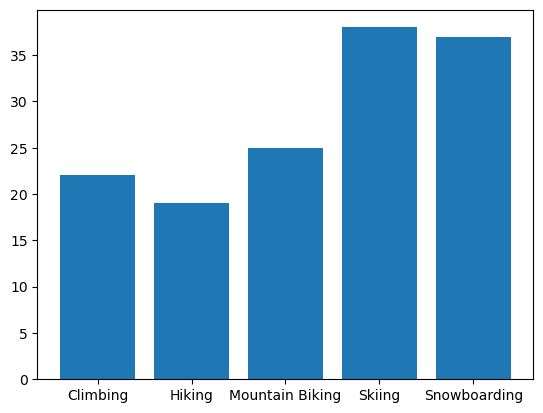

In [69]:
plt.bar(activity_dist['Activity'], activity_dist['count'])

In [72]:
devil_drop_data.groupby('Weather').size().reset_index(name='count')

,Weather,count
0,Foggy,25
1,Rainy,25
2,Snowy,22
3,Sunny,29
4,Windy,40


In [74]:
incidents_data.groupby('Season').size().reset_index(name='count')

,Season,count
0,Summer,488
1,Winter,512
